# Projet 5 :
# Optimisez la gestion des données d'une boutique avec R ou Python

## Sommaire <a id='sommaire'></a>

<ol>
    <li><a href="#erp">Préparation données fichier erp</a></li> 
    <li><a href="#liaison">Préparation données fichier liaison</a></li> 
    <li><a href="#web">Préparation données fichier web</a></li> 
    <li><a href="#jointure">Jointure des 3 fichiers</a></li> 
    <li><a href="#ca">Chiffre d'affaires global</a></li> 
    <li><a href="#analyse_univariee">Analyse univariée de la variable prix</a></li> 

</ol>

## Import des librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

folder='D:/Data_Analyst_Projet/Projet 5/Donnees/Donnees analyse python/'

## Import des fichiers

In [3]:
warnings.simplefilter("ignore")
erp=pd.read_excel(folder+'erp.xlsx')
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
web=pd.read_excel(folder+'web.xlsx')
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
liaison=pd.read_excel(folder+'liaison.xlsx')
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<a id='erp' ></a>
## Fichier erp <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [6]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### Renommage des colonnes

In [7]:
erp.rename(columns={'product_id' : 'id_produit',
                    'onsale_web' : 'vente_web',
                    'price' : 'prix',
                    'stock_quantity' : 'quantite_stock',
                    'stock_status' : 'status_stock'}, inplace=True)

In [8]:
erp.head()

,id_produit,vente_web,prix,quantite_stock,status_stock
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### Description du fichier

In [9]:
erp.shape

(825, 5)

In [10]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_produit      825 non-null    int64  
 1   vente_web       825 non-null    int64  
 2   prix            825 non-null    float64
 3   quantite_stock  825 non-null    int64  
 4   status_stock    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [11]:
erp.describe(include='all')

,id_produit,vente_web,prix,quantite_stock,status_stock
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


### Modification des types de variable

In [12]:
erp['vente_web']=erp['vente_web'].astype('category')
erp['status_stock']=erp['status_stock'].astype('category')

In [13]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id_produit      825 non-null    int64   
 1   vente_web       825 non-null    category
 2   prix            825 non-null    float64 
 3   quantite_stock  825 non-null    int64   
 4   status_stock    825 non-null    category
dtypes: category(2), float64(1), int64(2)
memory usage: 21.3 KB


### Traitements des valeurs nulles

In [14]:
erp[erp.isnull().any(axis=1)]

,id_produit,vente_web,prix,quantite_stock,status_stock


In [15]:
erp.isnull().sum()

id_produit        0
vente_web         0
prix              0
quantite_stock    0
status_stock      0
dtype: int64

Pas de valeurs nulles, cela vient confirmer ce qu'on avait vu avec la méthode info()

### Traitements des doublons

In [16]:
erp[erp.duplicated(subset='id_produit')]

,id_produit,vente_web,prix,quantite_stock,status_stock


### Part des ventes web apparentes

In [17]:
erp['vente_web'].value_counts()

1    717
0    108
Name: vente_web, dtype: int64

Nous vérifierons si cela est vrai avec le fichier de liaison et web, si les produits affichés vendus sur le web sont bien vendus sur le web, et si ceux affichés non vendus sont bien non vendus sur le web.

### Vérification de la cohérence entre quantite_stock et status_stock

In [18]:
erp['status_stock'].value_counts()

instock       638
outofstock    187
Name: status_stock, dtype: int64

In [19]:
erp[erp['quantite_stock']==0].count()

id_produit        188
vente_web         188
prix              188
quantite_stock    188
status_stock      188
dtype: int64

1 erreur : 1 produit est considéré en stock alors que sa quantité en stock est nulle.

Nous allons modifier cela.

In [20]:
erp.loc[(erp['quantite_stock']==0) & (erp['status_stock']=='instock'), :]

,id_produit,vente_web,prix,quantite_stock,status_stock
443,4954,1,25.0,0,instock


In [21]:
erp.loc[(erp['quantite_stock']==0) & (erp['status_stock']=='instock'), 'status_stock'] = 'outofstock'

In [22]:
erp.loc[(erp['quantite_stock']==0) & (erp['status_stock']=='instock'), :].count()

id_produit        0
vente_web         0
prix              0
quantite_stock    0
status_stock      0
dtype: int64

<a id='liaison' ></a>
## Fichier liaison <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [23]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### Renommage colonne

In [24]:
liaison.rename(columns={'product_id' : 'id_produit'}, inplace=True)

### Description fichier

In [25]:
liaison.shape

(825, 2)

In [26]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_produit  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [27]:
liaison.describe(include='all')

,id_produit,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


On a les 825 références de l'ERP représentées avec 734 correspondances dans web, soit 91 valeurs nulles pour id_web

In [28]:
liaison.isnull().sum()

id_produit     0
id_web        91
dtype: int64

In [29]:
liaison[liaison.isnull().any(axis=1)]

,id_produit,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


### Placement des produits erp sans correspondance dans une variable

In [30]:
produit_erp_sans_correspondance=liaison[liaison.isnull().any(axis=1)]['id_produit'].reset_index(drop=True)
produit_erp_sans_correspondance

0     4055
1     4090
2     4092
3     4195
4     4209
      ... 
86    7196
87    7200
88    7201
89    7203
90    7204
Name: id_produit, Length: 91, dtype: int64

Nous allons supprimer ces valeurs nulles, car ces références ne trouvent pas de correspondance.

### Suppression des lignes sans correspondance

In [31]:
liaison.dropna(axis=0, how='any', inplace=True)

### Des erreurs à modifier pour la conversion

In [32]:
# on la supprime car cette référence n'existe pas dans web
liaison.drop(liaison[liaison['id_web']=='14680-1'].index, inplace=True)

In [33]:
liaison.loc[liaison['id_web']=='bon-cadeau-25-euros', 'id_web']=19823
liaison.loc[liaison['id_web']=='13127-1', 'id_web']=13128

### Conversion en entier de id_web

In [34]:
liaison['id_web']=liaison['id_web'].astype('int64', errors='raise')

In [35]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_produit  733 non-null    int64
 1   id_web      733 non-null    int64
dtypes: int64(2)
memory usage: 17.2 KB


In [36]:
liaison.describe()

,id_produit,id_web
count,733.000000,733.00000
mean,5038.739427,14491.86221
std,786.311710,2975.99534
min,3847.000000,38.00000
25%,4287.000000,14371.00000
50%,4862.000000,15361.00000
75%,5712.000000,15870.00000
max,7338.000000,19823.00000


<a id='web' ></a>
## Fichier web <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [37]:
web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

### Supression des colonnes inutiles

In [38]:
web.drop(columns=['virtual', 'downloadable', 'rating_count', 'average_rating',
        'tax_status', 'tax_class', 'post_author',
       'post_date_gmt', 'post_content', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_mime_type', 'comment_count'], inplace=True)

In [39]:
web.head()

,sku,total_sales,post_date,post_title,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product


### Renommage des colonnes 

In [40]:
web.rename(columns={'sku' : 'id_web', 'total_sales' : 'total_vente',
                    'post_date' : 'date_creation', 'post_title' : 'description'}, inplace=True)

### Exploration fichier

In [41]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_web         1428 non-null   object        
 1   total_vente    1430 non-null   float64       
 2   date_creation  1430 non-null   datetime64[ns]
 3   description    1430 non-null   object        
 4   post_type      1430 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 59.2+ KB


### Valeurs nulles

In [42]:
web.isnull().sum()

id_web           85
total_vente      83
date_creation    83
description      83
post_type        83
dtype: int64

In [43]:
web[web.isnull().any(axis=1)]

,id_web,total_vente,date_creation,description,post_type
178,NaN,NaN,NaT,NaN,NaN
179,NaN,NaN,NaT,NaN,NaN
227,NaN,NaN,NaT,NaN,NaN
230,NaN,NaN,NaT,NaN,NaN
231,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...
792,NaN,NaN,NaT,NaN,NaN
793,NaN,NaN,NaT,NaN,NaN
794,NaN,NaN,NaT,NaN,NaN
795,NaN,NaN,NaT,NaN,NaN


### Suppression des valeurs nulles

In [44]:
web.dropna(axis=0, how='any', inplace=True)

In [45]:
web.head()

,id_web,total_vente,date_creation,description,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product


### Suppression des type attachment

In [46]:
web['post_type'].value_counts()

product       714
attachment    714
Name: post_type, dtype: int64

In [47]:
web.drop(web[web['post_type']=='attachment'].index, inplace=True)

In [48]:
web.drop(columns='post_type', inplace=True)

### Modification du type de 'id_web'

In [49]:
web.loc[web['id_web']=='bon-cadeau-25-euros', 'id_web']=19823
web.loc[web['id_web']=='13127-1', 'id_web']=13128

In [50]:
web['id_web']=web['id_web'].astype('int64', errors='raise')

### Modification du type de 'total_vente'

In [51]:
web['total_vente']=web['total_vente'].astype('int64', errors='raise')

In [52]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_web         714 non-null    int64         
 1   total_vente    714 non-null    int64         
 2   date_creation  714 non-null    datetime64[ns]
 3   description    714 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 27.9+ KB


In [53]:
web.describe()

,id_web,total_vente
count,714.000000,714.000000
mean,14485.224090,4.012605
std,3012.431806,8.518183
min,38.000000,0.000000
25%,14367.250000,0.000000
50%,15380.000000,1.000000
75%,15880.750000,4.000000
max,19823.000000,96.000000


<a id='jointure'></a>
## Jointure des 3 fichiers <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [54]:
erp.head()

,id_produit,vente_web,prix,quantite_stock,status_stock
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [55]:
web.head()

,id_web,total_vente,date_creation,description
0,19823,10,2018-06-01 13:53:46,Bon cadeau de 25€
1,15298,6,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018
2,15296,0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
3,15300,0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...
4,19814,3,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...


In [56]:
jointure_inter=pd.merge(erp, liaison, how='left', on='id_produit')

In [57]:
jointure_inter.head()

,id_produit,vente_web,prix,quantite_stock,status_stock,id_web
0,3847,1,24.2,0,outofstock,15298.0
1,3849,1,34.3,0,outofstock,15296.0
2,3850,1,20.8,0,outofstock,15300.0
3,4032,1,14.1,0,outofstock,19814.0
4,4039,1,46.0,0,outofstock,19815.0


In [58]:
df_global=pd.merge(jointure_inter, web, how='left', on='id_web')

In [59]:
df_global.head()

,id_produit,vente_web,prix,quantite_stock,status_stock,id_web,total_vente,date_creation,description
0,3847,1,24.2,0,outofstock,15298.0,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,1,34.3,0,outofstock,15296.0,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,1,20.8,0,outofstock,15300.0,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,1,14.1,0,outofstock,19814.0,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,1,46.0,0,outofstock,19815.0,0.0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017


In [60]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_produit      825 non-null    int64         
 1   vente_web       825 non-null    category      
 2   prix            825 non-null    float64       
 3   quantite_stock  825 non-null    int64         
 4   status_stock    825 non-null    category      
 5   id_web          733 non-null    float64       
 6   total_vente     714 non-null    float64       
 7   date_creation   714 non-null    datetime64[ns]
 8   description     714 non-null    object        
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 53.4+ KB


In [61]:
df_global.describe()

,id_produit,prix,quantite_stock,id_web,total_vente
count,825.000000,825.000000,825.000000,733.00000,714.000000
mean,5162.597576,32.415636,26.496970,14491.86221,4.012605
std,902.644635,26.795849,45.892422,2975.99534,8.518183
min,3847.000000,5.200000,0.000000,38.00000,0.000000
25%,4348.000000,14.600000,1.000000,14371.00000,0.000000
50%,4907.000000,24.400000,11.000000,15361.00000,1.000000
75%,5805.000000,42.000000,34.000000,15870.00000,4.000000
max,7338.000000,225.000000,578.000000,19823.00000,96.000000


### Création de la colonne CA

In [62]:
df_global['CA']=df_global['prix']*df_global['total_vente']

In [63]:
df_global

,id_produit,vente_web,prix,quantite_stock,status_stock,id_web,total_vente,date_creation,description,CA
0,3847,1,24.2,0,outofstock,15298.0,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,145.2
1,3849,1,34.3,0,outofstock,15296.0,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0
2,3850,1,20.8,0,outofstock,15300.0,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0
3,4032,1,14.1,0,outofstock,19814.0,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3
4,4039,1,46.0,0,outofstock,19815.0,0.0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0
...,...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,NaN,NaT,NaN,NaN
821,7204,0,45.0,9,instock,NaN,NaN,NaT,NaN,NaN
822,7247,1,54.8,23,instock,13128.0,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,0.0
823,7329,0,26.5,14,instock,NaN,NaN,NaT,NaN,NaN


<a id='ca'></a>
## Chiffre d'affaires global <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [64]:
df_global['CA'].sum()

70568.6

On a donc un chiffre d'affaires de 70 568,60€ pour l'ensemble de produits vendus.

<a id='analyse_univariee'></a>
## Analyse univariée de la variable prix <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

### Histogramme

Text(0.5, 1.0, 'Distribution du prix des bouteilles de vin')

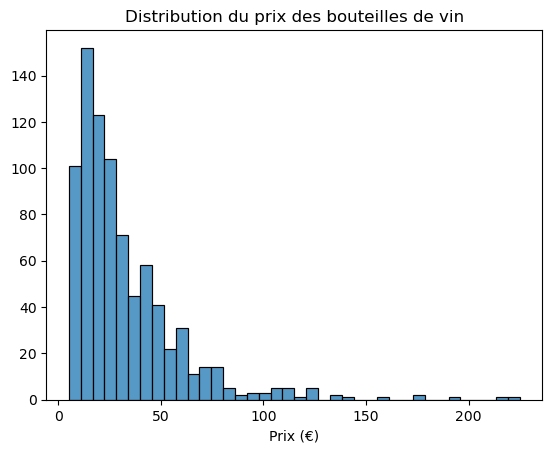

In [124]:
sns.histplot((erp['prix']))
plt.ylabel(None)
plt.xlabel('Prix (€)')
plt.title('Distribution du prix des bouteilles de vin')

### Les mesures de tendance centrale

In [66]:
print("La moyenne de l'échantillon est de", erp['prix'].mean(),'\n',
"La médiane est de",erp['prix'].median(),'\n',
"Le mode est de",erp['prix'].mode())

La moyenne de l'échantillon est de 32.41563636363638 
 La médiane est de 24.4 
 Le mode est de 0    45.0
Name: prix, dtype: float64


On peut voir que ces 3 valeurs sont éloignées, on peut déjà conclure que la distribution des valeurs de l'échantillon ne suit pas une loi normale.

### Calcul de la moyenne tronquée
Le calcul de la moyenne tronquée se faire en enlevant les outliers de l'échantillon, et plus précisement en retirant 2,5% des valeurs minimales et 2,5% des valeurs maximales.

In [67]:
# Je retire ici 2,5% des valeurs min et max de l'échantillon et je calcule la moyenne
erp['prix'].sort_values()[(int(0.025*erp['prix'].shape[0])):-(int(0.025*erp['prix'].shape[0]))].mean()

30.27044585987261

La moyenne tronquée est donc de 30.27, cela semble plus juste au regard de la médiane notamment.

### Les mesures de dispersion

In [68]:
# La variance
erp['prix'].var()

718.0175343336277

In [69]:
# La variance sans biais
erp['prix'].var(ddof=0)

717.147210049587

In [70]:
# L'écart type
erp['prix'].std()

26.795849199710535

In [71]:
# Le coefficient de variation
erp['prix'].std()/erp['prix'].mean()

0.8266334462515725

Ce coefficient de variation est énorme, idéalement, on aime avoir un coefficient de variation inférieur à 0.15, et on considère que la distribution de l'échantillon est trop dispersée si son coefficient de variation est supérieur à 0.30.

### La boxplot

Text(0.5, 1.0, "Boxplot des prix sans les 2,5% d'outliers min et max")

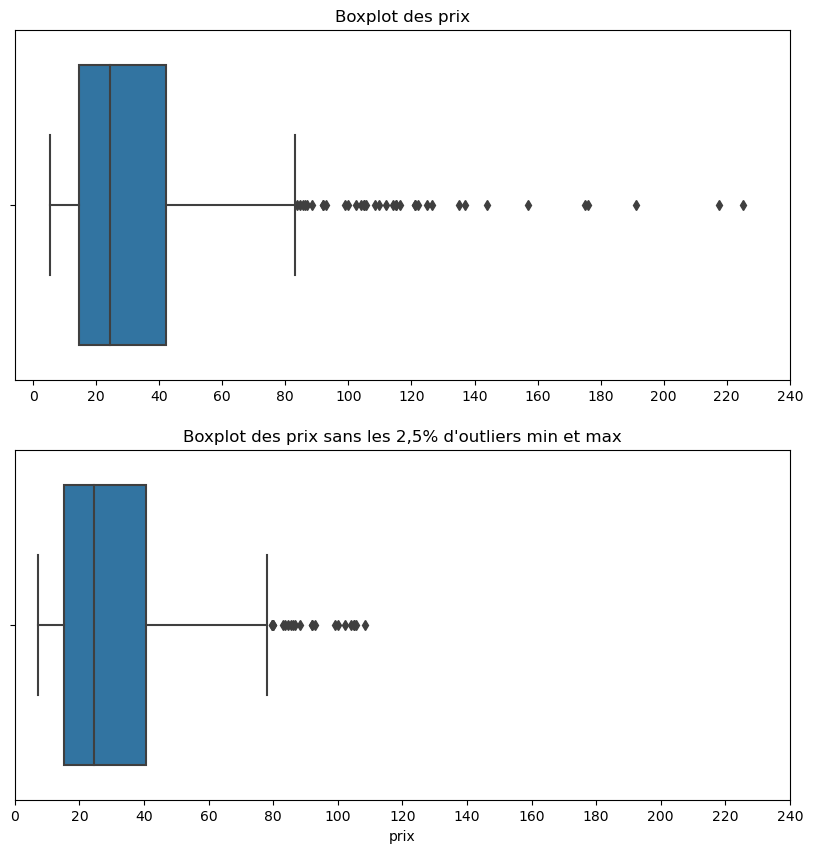

In [72]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.boxplot(erp['prix'])
plt.xticks(np.arange(0,250,20))
plt.xlabel(None)
plt.title('Boxplot des prix')

plt.subplot(2,1,2)
sns.boxplot(erp['prix'].sort_values()[(int(0.025*erp['prix'].shape[0])):-(int(0.025*erp['prix'].shape[0]))])
plt.xticks(np.arange(0,250,20))
plt.title("Boxplot des prix sans les 2,5% d'outliers min et max")

On peut voir sur la première boxplot beaucoup de prix considérés abberants par la diagramme boite à moustaches, tous les prix supérieur à **Q3 + 1.5 * IQR** soit 83.10€.

### L'IQR
L'IQR est l'écart interquartile, c'est à dire la différence entre le 3e quartile et le premier quartile.
C'est un indicateur robuste sur la distribution d'un échantillon.

In [73]:
Q3 = np.quantile(erp['prix'], 0.75)
Q1 = np.quantile(erp['prix'], 0.25)
IQR = Q3-Q1
print(IQR)

27.4


In [74]:
# Valeurs au delà de laquelle les prix sont considérés abberants par la diagramme boite à moustache
Q3+1.5*IQR

83.1

### Les mesures de forme

Calcul du skewness empirique.
C'est une mesure d'asymétrie. L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale.

In [75]:
erp['prix'].skew()

2.6227973685638717

On a γ1>0, ce qui veut dire que la distribution est étalée à droite. Cela confirme ce qu'on a vu précédemment.

Calcul du kurtosis empirique qui est une mesure d'aplatissement. On pourra comparer l'aplatissement à la distribution normal.

In [76]:
erp['prix'].kurtosis()

10.615358266001198

On a γ2>0, donc la distribution est moins aplatie que la distribution normale :  les observations sont plus concentrées.

## Test de normalités
Nous allons faire passer des tests de normalité à notre variable.
Nous passerons le test de Test de Kolmogorov-Smirnov puis de Shapiro-Wilk.

Le test de Kolmogorov-Smirnov est un test d'hypothèse utilisé pour déterminer si un échantillon suit bien une loi donnée connue par sa fonction de répartition continue (en l'occurence pour nous la loi normale), ou bien si deux échantillons suivent la même loi.

In [95]:
import scipy.stats as st

In [108]:
x=np.linspace(-5,5,1000)
y= st.norm.pdf(x)

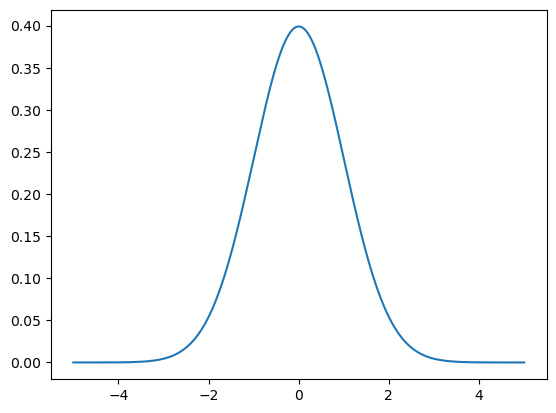

In [109]:
plt.plot(x,y)

In [135]:
x=erp['prix']
results = st.kstest(x, 'norm')
print(results)

KstestResult(statistic=0.9999999003557368, pvalue=0.0)


In [84]:
x=np.random.randn(10000)
results = st.kstest(x, 'norm')
print(results)

KstestResult(statistic=0.011424213837950337, pvalue=0.14585705598783083)


In [85]:
x=np.log10(erp['prix'])
results = st.kstest(x, 'norm')
print(results)

KstestResult(statistic=0.781578009325257, pvalue=0.0)


Text(0.5, 0, 'Prix (€)')

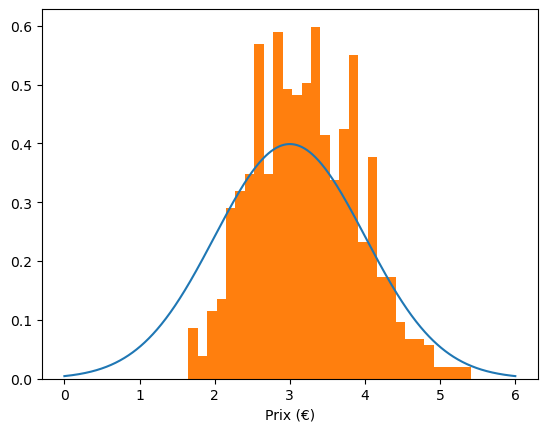

In [134]:
x=np.linspace(0, 6,1000)
y= st.norm.pdf(x, loc=3)

plt.plot(x,y)

plt.hist((np.log(erp['prix'])), density=True, bins=30)
plt.ylabel(None)
plt.xlabel('Prix (€)')
# plt.title('Distribution du prix des bouteilles de vin')

## Tests paramétriques vs non paramétriques
Lorsque l’on réalise des comparaisons de population ou que l’on compare une population à une valeur théorique, il existe deux grandes familles de tests : les tests paramétriques, et les tests non paramétriques.

Si on conclue que notre échantillon suit une loi normal, on pourra s'orienter vers des tests paramétriques (basé sur la moyenne), dans le cas contraire, on s'orientera vers des tests non paramétriques (basé sur la médiane).

### Tests paramétriques

Les tests paramétriques fonctionnent en supposant que les données que l’on a à disposition suivent un type de loi de distribution connu (en général la loi normale).

Pour calculer le risque alpha du test statistique, il suffit de calculer la moyenne et l’écart-type de l’échantillon afin d’accéder à la loi de distribution de l’échantillon.

Test paramétrique
La loi de distribution étant ainsi parfaitement connue, on peut calculer le risque alpha en se basant sur les calculs théoriques de la loi gaussienne.

### Tests non paramétriques

Les tests non paramétriques ne font aucune hypothèse sur le type de loi de distribution des données. Ils se basent uniquement sur les propriétés numériques des échantillons. 